In [87]:
# 1. Imports
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# 2. Feature Extraction Function
def extract_features(voltage, file_name, device, protocol):
    return {
        'File': file_name,
        'Device': device,
        'Protocol': protocol,
        'Mean': np.mean(voltage),
        'Standard_Deviation': np.std(voltage),
        'Variance': np.var(voltage),
        'Skewness': skew(voltage),
        'Kurtosis': kurtosis(voltage),
        'Energy': np.sum(voltage**2),
        'RMS': np.sqrt(np.mean(voltage**2)),
        'Maximum': np.max(voltage),
        'Minimum': np.min(voltage)
    }
# 3. File Mapping
file_map = {
    'ArduinoNano': {
        'UART': [
            '/content/UTRGV-Capstone-2025/Data/Processed/Arduino_Nano_9600_dataset.csv'
        ]
    },
    'ArduinoUno': {
        'UART': [
            '/content/UTRGV-Capstone-2025/Data/Processed/Arduino_UNO_9600_dataset.csv'
        ]
    },
    'ESP32': {
        'UART': [
            '/content/UTRGV-Capstone-2025/Data/Processed/ESP_32_9600_dataset.csv'
        ]
    },
    'RaspberryPi5': {
        'UART': [
            '/content/UTRGV-Capstone-2025/Data/Processed/RPi_5B_9600_dataset.csv',

        ]
    }
}

# 4. Process All Files
combined_features = []
for device, protocols in file_map.items():
    for protocol, files in protocols.items():
        batch_features = []
        for file in files:
            df = pd.read_csv(file, skiprows=1)
            voltage = df.iloc[:, 1].dropna().values
            features = extract_features(voltage, file, device, protocol)
            batch_features.append(features)
            combined_features.append(features)

        # Save per device-protocol
        pd.DataFrame(batch_features).to_csv(f'{device}_{protocol}_Features.csv', index=False)

# 5. Save Combined Dataset
pd.DataFrame(combined_features).to_csv('AllDevices_AllProtocols_Features.csv', index=False)

# 6. Preview
pd.DataFrame(combined_features)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) # Also set max column width to display full cell content

# Display the DataFrame
print(pd.DataFrame(combined_features))


                                                                        File  \
0  /content/UTRGV-Capstone-2025/Data/Processed/Arduino_Nano_9600_dataset.csv   
1   /content/UTRGV-Capstone-2025/Data/Processed/Arduino_UNO_9600_dataset.csv   
2        /content/UTRGV-Capstone-2025/Data/Processed/ESP_32_9600_dataset.csv   
3        /content/UTRGV-Capstone-2025/Data/Processed/RPi_5B_9600_dataset.csv   

         Device Protocol      Mean  Standard_Deviation  Variance   Skewness  \
0   ArduinoNano     UART  0.022327            0.008000  0.000064   0.616231   
1    ArduinoUno     UART  0.022613            0.032977  0.001088  14.490945   
2         ESP32     UART  0.015305            0.005349  0.000029   1.108137   
3  RaspberryPi5     UART  0.021322            0.002895  0.000008   1.052949   

     Kurtosis    Energy       RMS   Maximum   Minimum  
0    1.062389  0.168182  0.023717  0.057156  0.005207  
1  238.402214  0.510032  0.039986  0.571929  0.000864  
2    2.338133  0.075964  0.016213  

In [88]:
pd.DataFrame(combined_features)

,File,Device,Protocol,Mean,Standard_Deviation,Variance,Skewness,Kurtosis,Energy,RMS,Maximum,Minimum
0,/content/UTRGV-Capstone-2025/Data/Processed/Arduino_Nano_9600_dataset.csv,ArduinoNano,UART,0.022327,0.008000,0.000064,0.616231,1.062389,0.168182,0.023717,0.057156,0.005207
1,/content/UTRGV-Capstone-2025/Data/Processed/Arduino_UNO_9600_dataset.csv,ArduinoUno,UART,0.022613,0.032977,0.001088,14.490945,238.402214,0.510032,0.039986,0.571929,0.000864
2,/content/UTRGV-Capstone-2025/Data/Processed/ESP_32_9600_dataset.csv,ESP32,UART,0.015305,0.005349,0.000029,1.108137,2.338133,0.075964,0.016213,0.040689,0.005948
3,/content/UTRGV-Capstone-2025/Data/Processed/RPi_5B_9600_dataset.csv,RaspberryPi5,UART,0.021322,0.002895,0.000008,1.052949,2.233658,0.138443,0.021518,0.033678,0.016413


In [89]:
pd.DataFrame(batch_features).to_csv(f'{device}_{protocol}_Features.csv', index=False)
pd.DataFrame(combined_features).to_csv('AllDevices_AllProtocols_Features.csv', index=False)

In [90]:
df = pd.read_csv('AllDevices_AllProtocols_Features.csv')

# Separate features and labels
X = df.drop(columns=['File', 'Device', 'Protocol'])
y = df['Device']  # or use Protocol if you want protocol classification

In [91]:
print(df.columns)

Index(['File', 'Device', 'Protocol', 'Mean', 'Standard_Deviation', 'Variance',
       'Skewness', 'Kurtosis', 'Energy', 'RMS', 'Maximum', 'Minimum'],
      dtype='object')


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [94]:
print("Train set distribution:\n", y_train.value_counts())
print("Validation set distribution:\n", y_val.value_counts())

Train set distribution:
 Device
RaspberryPi5    1
ArduinoNano     1
ESP32           1
Name: count, dtype: int64
Validation set distribution:
 Device
ArduinoUno    1
Name: count, dtype: int64


In [95]:
print("Train set distribution:\n", y_train.value_counts())
print("\nTest set distribution:\n", y_test.value_counts())

Train set distribution:
 Device
RaspberryPi5    1
ArduinoNano     1
ESP32           1
Name: count, dtype: int64

Test set distribution:
 Device
RaspberryPi5    1
ArduinoNano     1
ArduinoUno      1
ESP32           1
Name: count, dtype: int64


In [96]:
# Validate if predicted brand and protocol are consistent
# Define known valid combinations
valid_pairs = {
    ('ArduinoUno', 'UART'),
    ('ArduinoNano', 'UART'),
    ('ESP32', 'UART'),
    ('RaspberryPi5', 'UART')
    # Add I2C/SPI combos as needed
}

# Ensure df has the correct columns for this check by reloading the combined features file
df = pd.read_csv('AllDevices_AllProtocols_Features.csv')

# Apply rule-based check
def check_consistency(row):
    return 'Valid' if (row['Device'], row['Protocol']) in valid_pairs else 'Suspicious'

df['Consistency'] = df.apply(check_consistency, axis=1)

# Summary
print("Brand-Protocol Consistency Check")
print(df['Consistency'].value_counts())

Brand-Protocol Consistency Check
Consistency
Valid    4
Name: count, dtype: int64


In [97]:
# For each device file, split into chunks and compute features
window_size = 1000  # samples per segment
features = []
for device, protocols in file_map.items():
    for protocol, files in protocols.items():
        for file in files:
            df = pd.read_csv(file, skiprows=1)
            voltage = df.iloc[:, 1].dropna().values
            for i in range(0, len(voltage), window_size):
                segment = voltage[i:i+window_size]
                if len(segment) == window_size:
                    features.append({
                        'Device': device,
                        'Protocol': protocol,
                        'Mean': np.mean(segment),
                        'Std': np.std(segment),
                        'Variance': np.var(segment),
                        'Skewness': skew(segment),
                        'Kurtosis': kurtosis(segment),
                        'Energy': np.sum(segment**2),
                        'RMS': np.sqrt(np.mean(segment**2)),
                        'Max': np.max(segment),
                        'Min': np.min(segment)
                    })
df = pd.DataFrame(features)


In [98]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import glob

#  Step 1: Load all device CSVs
path = "/content/UTRGV-Capstone-2025/Data/Processed/"
files = [
    "Arduino_Nano_9600_dataset.csv",
    "Arduino_UNO_9600_dataset.csv",
    "ESP_32_9600_dataset.csv",
    "RPi_5B_9600_dataset.csv"
]

dfs = []
for file in files:
    device_name = file.split("_")[1]  # Extract device name (Nano, UNO, ESP, RPi)
    df_temp = pd.read_csv(path + file)
    df_temp['Device'] = device_name  # Add device label
    dfs.append(df_temp)

#  Combine all rows into one DataFrame
df = pd.concat(dfs, ignore_index=True)
print("Shape after combining:", df.shape)
print(df['Device'].value_counts())

#  Step 2: Prepare features and labels
X = df.select_dtypes(include='number')  # All numeric columns
y = df['Device']  # Target labels

# Handle NaN values: Drop rows with NaNs from X and corresponding rows from y
initial_rows = len(X)
non_nan_indices = X.dropna().index
X = X.loc[non_nan_indices]
y = y.loc[non_nan_indices]
print(f"Removed {initial_rows - len(X)} rows containing NaN values.")

#  Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Step 4: Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#  Step 5: Train-test split
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Step 6: Define models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=min(5, len(X_train))),
    "LogisticRegression": LogisticRegression(solver='saga', max_iter=5000),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

#  Step 7: Train and evaluate
results = []
for name, model in models.items():
    print(f"\n Evaluating {name}...")
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_val)
    y_pred_decoded = le.inverse_transform(y_pred)
    y_val_decoded = le.inverse_transform(y_val_encoded)

    report = classification_report(y_val_decoded, y_pred_decoded, zero_division=0)
    score = classification_report(y_val_decoded, y_pred_decoded, output_dict=True, zero_division=0)

    print(report)
    results.append((name, score['accuracy']))

#  Step 8: Summary
print("\n Model Accuracy Summary:")
for name, acc in results:
    print(f"{name}: {acc:.2f}")

Shape after combining: (1211, 24)
Device
UNO     320
Nano    300
5B      300
32      291
Name: count, dtype: int64
Removed 1 rows containing NaN values.

 Evaluating RandomForest...
              precision    recall  f1-score   support

          32       0.98      0.97      0.97        58
          5B       0.97      0.98      0.98        60
        Nano       1.00      1.00      1.00        60
         UNO       1.00      1.00      1.00        64

    accuracy                           0.99       242
   macro avg       0.99      0.99      0.99       242
weighted avg       0.99      0.99      0.99       242


 Evaluating SVM...
              precision    recall  f1-score   support

          32       0.96      0.86      0.91        58
          5B       0.88      0.97      0.92        60
        Nano       1.00      0.98      0.99        60
         UNO       0.98      1.00      0.99        64

    accuracy                           0.95       242
   macro avg       0.96      0.95    

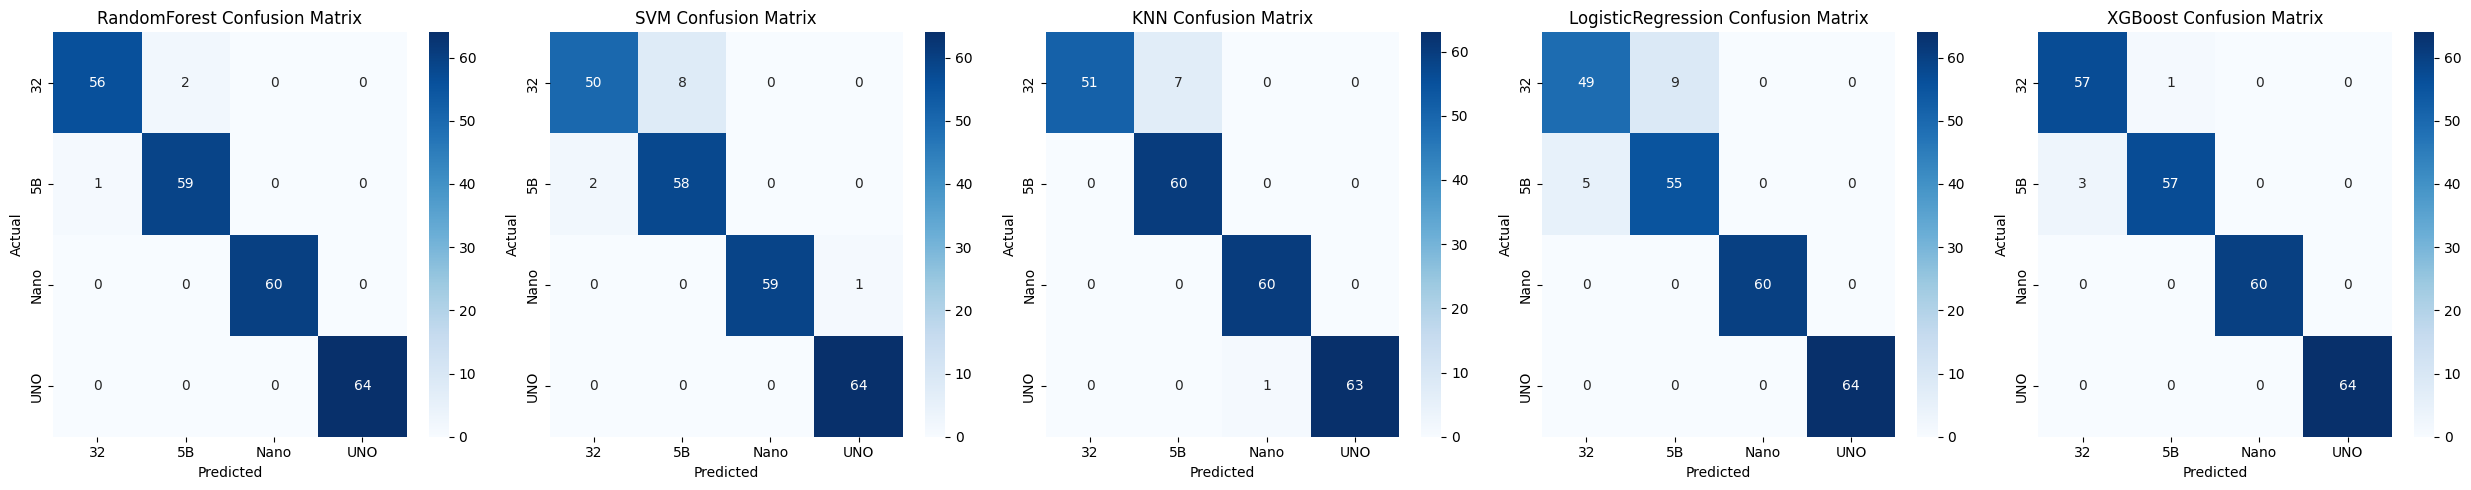

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#  After training and evaluation loop
labels = le.classes_  # Device names from LabelEncoder
fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 5))

for ax, (name, model) in zip(axes, models.items()):
    # Predict again for confusion matrix
    y_pred = model.predict(X_val)
    y_pred_decoded = le.inverse_transform(y_pred)
    y_val_decoded = le.inverse_transform(y_val_encoded)

    # Compute confusion matrix
    cm = confusion_matrix(y_val_decoded, y_pred_decoded, labels=labels)

    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()